### Introduction/Method ###

Displacement comes in many forms, and one of them can come from gentrification of neighborhoods. In theory, gentrification of neighborhoods would cause all sort of economical changes - such as increasing rent and property values, increase in income of residents of that area, or even demographic changes as well. Generally, these are quality indicators of gentrification. With these changes to the neighborhood, it can cause original and often poorer residents to be forced move out due to economic and social pressures, thus displacement. Gentrification can be caused by many different factors, such as improved transportation systems, greenway development, et cetera. To begin, we shall identify potential places that are being gentrified in the Suffolk County, Massachussetts area - and move on our analysis from there.

### Income / Rent Ratio ###

To begin, I have collected data on income and rent data from 2013 to 2022 (in three year intervals), in which both datasets contain data that shows mean rental costs and mean household income based on the census tract.

In [83]:
income_data_2013_path = '../income_data/2013-income-data.csv'
income_data_2013 = pd.read_csv(income_data_2013_path)
household_data_2013_path = '../rent_data/2013-rent-data.csv'
household_data_2013 = pd.read_csv(household_data_2013_path)

income_data_2016_path = '../income_data/2016-income-data.csv'
income_data_2016 = pd.read_csv(income_data_2016_path)
household_data_2016_path = '../rent_data/2016-rent-data.csv'
household_data_2016 = pd.read_csv(household_data_2016_path)

income_data_2019_path = '../income_data/2019-income-data.csv'
income_data_2019 = pd.read_csv(income_data_2019_path)
household_data_2019_path = '../rent_data/2019-rent-data.csv'
household_data_2019 = pd.read_csv(household_data_2019_path)

income_data_2022_path = '../income_data/2022-income-data.csv'
income_data_2022 = pd.read_csv(income_data_2022_path)
household_data_2022_path = '../rent_data/2022-rent-data.csv'
household_data_2022 = pd.read_csv(household_data_2022_path)


In [84]:
# Cleaning data + Only extracting relevant columns

income_relevant_columns = ['GEO_ID', 'NAME', 'S1901_C01_012E']

household_relevant_columns = ['GEO_ID', 'DP04_0124E']

income_selected = income_data_2013[income_relevant_columns]
household_selected = household_data_2013[household_relevant_columns]

combined_data_2013 = pd.merge(income_selected, household_selected, on='GEO_ID', how='inner')

combined_data_2013.rename(columns={
    'S1901_C01_012E': 'Median Household Income',
    'DP04_0124E': 'Median Gross Rent'
}, inplace=True)

combined_data_2013 = combined_data_2013.drop(combined_data_2013.index[0])

combined_data_2013['Median Household Income'] = combined_data_2013['Median Household Income'].replace('-', np.nan)
combined_data_2013['Median Gross Rent'] = combined_data_2013['Median Gross Rent'].replace('0', np.nan)
# Drop rows with invalid income
combined_data_2013.dropna(subset=['Median Household Income', 'Median Gross Rent'], inplace=True)

combined_data_2013['Median Gross Rent'] = combined_data_2013['Median Gross Rent'].astype(int)
combined_data_2013['Median Household Income'] = combined_data_2013['Median Household Income'].astype(int)

combined_data_2013.head()

# Adding in Annual Rent based on Median
# Adding income to rent ratio

combined_data_2013['Annual Rent'] = combined_data_2013['Median Gross Rent'] * 12

combined_data_2013['Income to Rent Ratio'] = combined_data_2013['Median Household Income'] / combined_data_2013['Annual Rent']

combined_data_2013.head()

,GEO_ID,NAME,Median Household Income,Median Gross Rent,Annual Rent,Income to Rent Ratio
1,1400000US25025000100,"Census Tract 1, Suffolk County, Massachusetts",54107,1061,12732,4.249686
2,1400000US25025000201,"Census Tract 2.01, Suffolk County, Massachusetts",63784,852,10224,6.238654
3,1400000US25025000202,"Census Tract 2.02, Suffolk County, Massachusetts",51636,941,11292,4.572795
4,1400000US25025000301,"Census Tract 3.01, Suffolk County, Massachusetts",81927,526,6312,12.979563
5,1400000US25025000302,"Census Tract 3.02, Suffolk County, Massachusetts",69384,494,5928,11.704453


In [85]:
household_relevant_columns = ['GEO_ID', 'DP04_0126E']

income_selected = income_data_2016[income_relevant_columns]
household_selected = household_data_2016[household_relevant_columns]

combined_data_2016 = pd.merge(income_selected, household_selected, on='GEO_ID', how='inner')

combined_data_2016.rename(columns={
    'S1901_C01_012E': 'Median Household Income',
    'DP04_0126E': 'Median Gross Rent'
}, inplace=True)

combined_data_2016 = combined_data_2016.drop(combined_data_2016.index[0])

combined_data_2016['Median Household Income'] = combined_data_2016['Median Household Income'].replace('-', np.nan)
combined_data_2016['Median Gross Rent'] = combined_data_2016['Median Gross Rent'].replace('0', np.nan)
# Drop rows with invalid income
combined_data_2016.dropna(subset=['Median Household Income', 'Median Gross Rent'], inplace=True)

combined_data_2016['Median Gross Rent'] = combined_data_2016['Median Gross Rent'].astype(int)
combined_data_2016['Median Household Income'] = combined_data_2016['Median Household Income'].astype(int)

combined_data_2016['Annual Rent'] = combined_data_2016['Median Gross Rent'] * 12

combined_data_2016['Income to Rent Ratio'] = combined_data_2016['Median Household Income'] / combined_data_2016['Annual Rent']

combined_data_2016.head()

,GEO_ID,NAME,Median Household Income,Median Gross Rent,Annual Rent,Income to Rent Ratio
1,1400000US25025000100,"Census Tract 1, Suffolk County, Massachusetts",69818,1082,12984,5.377234
2,1400000US25025000201,"Census Tract 2.01, Suffolk County, Massachusetts",80932,833,9996,8.096439
3,1400000US25025000202,"Census Tract 2.02, Suffolk County, Massachusetts",66875,953,11436,5.847761
4,1400000US25025000301,"Census Tract 3.01, Suffolk County, Massachusetts",86773,607,7284,11.912823
5,1400000US25025000302,"Census Tract 3.02, Suffolk County, Massachusetts",72526,572,6864,10.566142


In [86]:
income_selected = income_data_2019[income_relevant_columns]
household_selected = household_data_2019[household_relevant_columns]

combined_data_2019 = pd.merge(income_selected, household_selected, on='GEO_ID', how='inner')

combined_data_2019.rename(columns={
    'S1901_C01_012E': 'Median Household Income',
    'DP04_0126E': 'Median Gross Rent'
}, inplace=True)

combined_data_2019 = combined_data_2019.drop(combined_data_2019.index[0])

combined_data_2019['Median Household Income'] = combined_data_2019['Median Household Income'].replace('-', np.nan)
combined_data_2019['Median Gross Rent'] = combined_data_2019['Median Gross Rent'].replace('0', np.nan)
# Drop rows with invalid income
combined_data_2019.dropna(subset=['Median Household Income', 'Median Gross Rent'], inplace=True)

combined_data_2019['Median Gross Rent'] = combined_data_2019['Median Gross Rent'].astype(int)
combined_data_2019['Median Household Income'] = combined_data_2019['Median Household Income'].astype(int)

combined_data_2019['Annual Rent'] = combined_data_2019['Median Gross Rent'] * 12

combined_data_2019['Income to Rent Ratio'] = combined_data_2019['Median Household Income'] / combined_data_2019['Annual Rent']

combined_data_2019.head()

,GEO_ID,NAME,Median Household Income,Median Gross Rent,Annual Rent,Income to Rent Ratio
1,1400000US25025000100,"Census Tract 1, Suffolk County, Massachusetts",90980,1533,18396,4.945640
2,1400000US25025000201,"Census Tract 2.01, Suffolk County, Massachusetts",93583,1111,13332,7.019427
3,1400000US25025000202,"Census Tract 2.02, Suffolk County, Massachusetts",79783,1014,12168,6.556788
4,1400000US25025000301,"Census Tract 3.01, Suffolk County, Massachusetts",126845,744,8928,14.207549
5,1400000US25025000302,"Census Tract 3.02, Suffolk County, Massachusetts",101958,580,6960,14.649138


In [87]:
income_selected = income_data_2022[income_relevant_columns]
household_selected = household_data_2022[household_relevant_columns]

combined_data_2022 = pd.merge(income_selected, household_selected, on='GEO_ID', how='inner')

combined_data_2022.rename(columns={
    'S1901_C01_012E': 'Median Household Income',
    'DP04_0126E': 'Median Gross Rent'
}, inplace=True)

combined_data_2022 = combined_data_2022.drop(combined_data_2022.index[0])

combined_data_2022['Median Household Income'] = combined_data_2022['Median Household Income'].replace('-', np.nan)
combined_data_2022['Median Gross Rent'] = combined_data_2022['Median Gross Rent'].replace('0', np.nan)
# Drop rows with invalid income
combined_data_2022.dropna(subset=['Median Household Income', 'Median Gross Rent'], inplace=True)

combined_data_2022['Median Gross Rent'] = combined_data_2022['Median Gross Rent'].astype(int)
combined_data_2022['Median Household Income'] = combined_data_2022['Median Household Income'].astype(int)

combined_data_2022['Annual Rent'] = combined_data_2022['Median Gross Rent'] * 12

combined_data_2022['Income to Rent Ratio'] = combined_data_2022['Median Household Income'] / combined_data_2022['Annual Rent']


In [88]:
# Assuming you have dataframes for each year named similar to combined_data_2013, combined_data_2016, etc.
geo_ids_2013 = set(combined_data_2013['GEO_ID'].unique())
geo_ids_2016 = set(combined_data_2016['GEO_ID'].unique())
geo_ids_2019 = set(combined_data_2019['GEO_ID'].unique())
geo_ids_2022 = set(combined_data_2022['GEO_ID'].unique())

# Find the intersection of all sets
common_geo_ids = geo_ids_2013.intersection(geo_ids_2016, geo_ids_2019, geo_ids_2022)

combined_data_2013 = combined_data_2013[combined_data_2013['GEO_ID'].isin(common_geo_ids)]
combined_data_2016 = combined_data_2016[combined_data_2016['GEO_ID'].isin(common_geo_ids)]
combined_data_2019 = combined_data_2019[combined_data_2019['GEO_ID'].isin(common_geo_ids)]
combined_data_2022 = combined_data_2022[combined_data_2022['GEO_ID'].isin(common_geo_ids)]


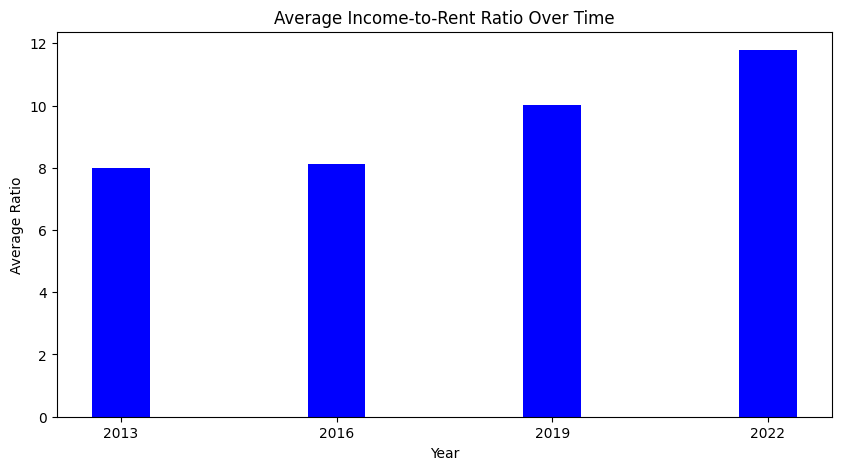

In [89]:
combined_data_2013['Year'] = 2013
combined_data_2016['Year'] = 2016
combined_data_2019['Year'] = 2019
combined_data_2022['Year'] = 2022

all_data = pd.concat([combined_data_2013, combined_data_2016, combined_data_2019, combined_data_2022])

average_ratios = all_data.groupby('Year')['Income to Rent Ratio'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(average_ratios['Year'], average_ratios['Income to Rent Ratio'], color='blue')
plt.title('Average Income-to-Rent Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Average Ratio')
plt.xticks(average_ratios['Year'])  # Ensure all years are displayed
plt.show()

The bar chart is a very simplistic way of seeing that over the span of 2013 to 2022, the average income to rent ratio has been increasing -- suggesting that income is growing faster than annual rent. While this suggests that affordability of apartments have improved (relative to resident's income), but this can also indicate that there has been an influx of higher-income residents coming into the Suffolk County in Massachussetts. Potential areas to look at for displacement:
- Demographic changes in these areas, along side with financial data based on demographic
- Create a mapping to show which census has a more severe increase in ratio, and which places have less

While the average of an income to rent ratio of the Suffolk County over a period of time is a good start, it doesn't tell us much. But it gives us a good direction on how we can expand these findings to tell us more about displacement in this area (whether or not it exists or not based on income/rent/gentrification data).

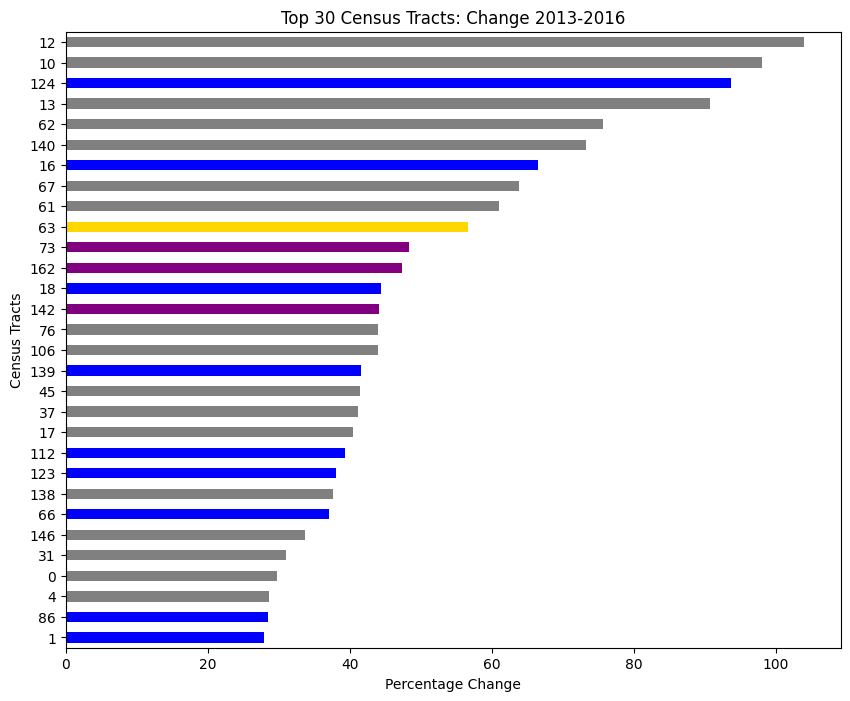

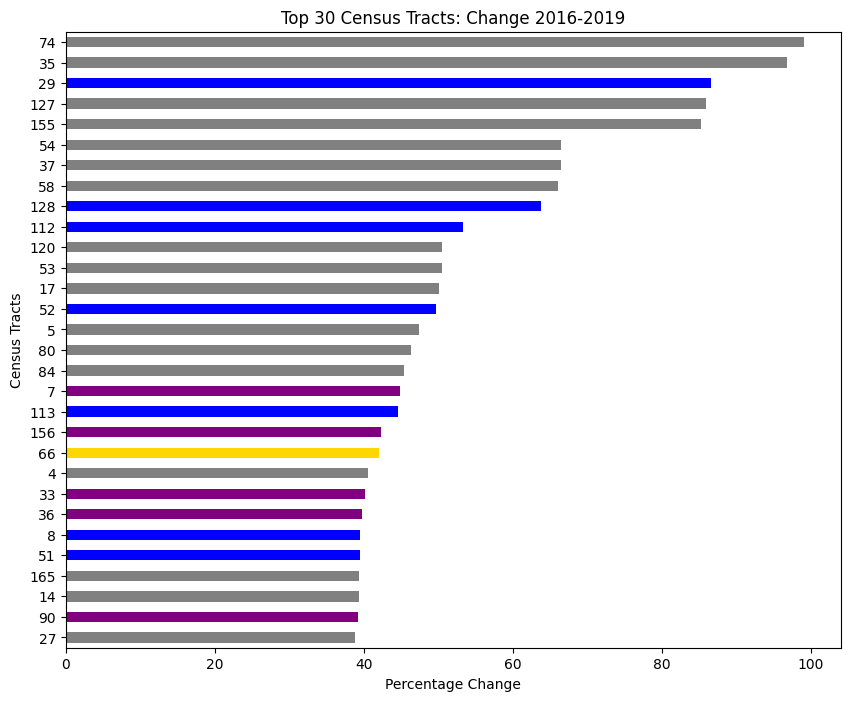

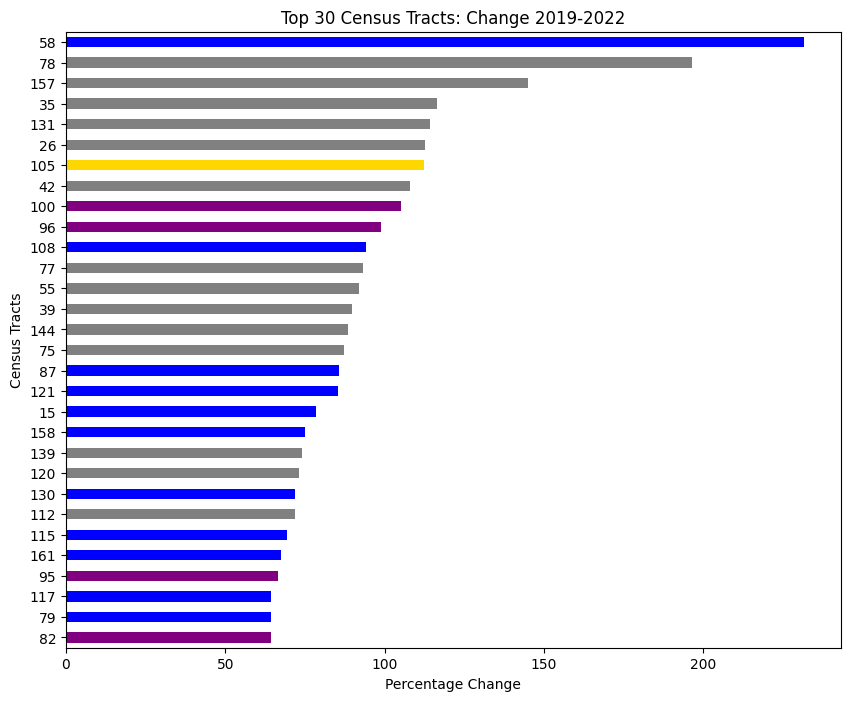

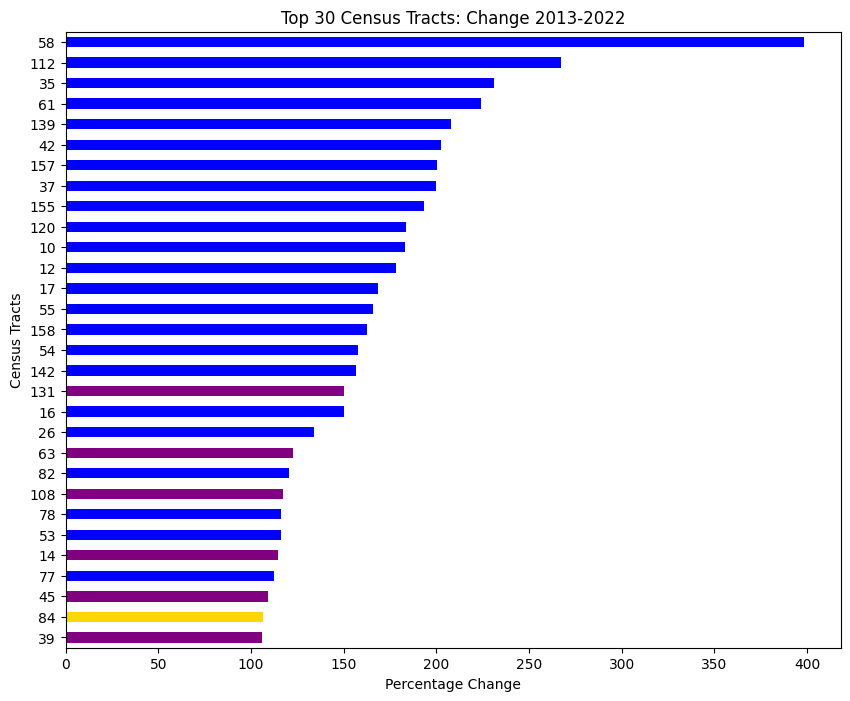

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_heatmap is your DataFrame from previous steps
# Sorting and selecting the top 30 for each period

def calculate_percentage_change(df, start_year, end_year, column_name='Income to Rent Ratio'):
    start_df = df[df['Year'] == start_year].set_index('GEO_ID')[column_name]
    end_df = df[df['Year'] == end_year].set_index('GEO_ID')[column_name]
    # Ensure no division by zero
    change = (end_df - start_df) / start_df.where(start_df != 0) * 100
    return change.dropna()  # Drop any NaN results from division or missing data

# Assuming 'all_data' is your concatenated DataFrame with a 'Year' column
change_2013_2016 = calculate_percentage_change(all_data, 2013, 2016)
change_2016_2019 = calculate_percentage_change(all_data, 2016, 2019)
change_2019_2022 = calculate_percentage_change(all_data, 2019, 2022)
change_2013_2022 = calculate_percentage_change(all_data, 2013, 2022)

data_for_heatmap = {
    'GEO_ID': [],
    'Change 2013-2016': [],
    'Change 2016-2019': [],
    'Change 2019-2022': [],
    'Change 2013-2022': []
}

for change, label in zip([change_2013_2016, change_2016_2019, change_2019_2022, change_2013_2022], 
                         ['Change 2013-2016', 'Change 2016-2019', 'Change 2019-2022', 'Change 2013-2022']):
    for geo_id, value in change.items():
        if geo_id not in data_for_heatmap['GEO_ID']:
            data_for_heatmap['GEO_ID'].append(geo_id)
            for k in data_for_heatmap:
                if k != 'GEO_ID':
                    data_for_heatmap[k].append(None)
        index = data_for_heatmap['GEO_ID'].index(geo_id)
        data_for_heatmap[label][index] = value

df_heatmap = pd.DataFrame(data_for_heatmap)
df_heatmap['GEO_ID'] = df_heatmap['GEO_ID'].astype(str)


def plot_individual_bar_chart(data, title, column):
    plt.figure(figsize=(10, 8))  # Set the size of the figure
    data = data.sort_values(by=column, ascending=True)  # Sort data for a better visual
    data[column].plot(kind='barh', color='skyblue')  # Create a horizontal bar chart
    plt.title(title)
    plt.xlabel('Percentage Change')
    plt.ylabel('Census Tracts')
    plt.show()  # Show the plot

# Assuming df_heatmap is your DataFrame from previous ste


# Sorting and selecting the top 30 for each period
top_tracts_2013_2016 = df_heatmap.sort_values(by='Change 2013-2016', ascending=False).head(30)
top_tracts_2016_2019 = df_heatmap.sort_values(by='Change 2016-2019', ascending=False).head(30)
top_tracts_2019_2022 = df_heatmap.sort_values(by='Change 2019-2022', ascending=False).head(30)
top_tracts_2013_2022 = df_heatmap.sort_values(by='Change 2013-2022', ascending=False).head(30)

tracts_list = [
    top_tracts_2013_2016.index.tolist(),
    top_tracts_2016_2019.index.tolist(),
    top_tracts_2019_2022.index.tolist(),
    top_tracts_2013_2022.index.tolist()
]

# Flatten the list and count occurrences
all_tracts = [tract for sublist in tracts_list for tract in sublist]
tract_counts = pd.Series(all_tracts).value_counts()

# Determine frequency of appearance
tract_frequency = tract_counts.to_frame(name='Frequency')

def assign_color(frequency):
    if frequency == 4:
        return 'gold'  # Appears in all four charts
    elif frequency == 3:
        return 'purple'  # Appears in three charts
    elif frequency == 2:
        return 'blue'  # Appears in two charts
    else:
        return 'grey'  # Appears in one chart

tract_frequency['Color'] = tract_frequency['Frequency'].apply(assign_color)

def plot_colored_bar_chart(data, title, column):
    plt.figure(figsize=(10, 8))
    colors = [tract_frequency.loc[tract, 'Color'] if tract in tract_frequency.index else 'grey' for tract in data.index]
    data[column].sort_values().plot(kind='barh', color=colors)
    plt.title(title)
    plt.xlabel('Percentage Change')
    plt.ylabel('Census Tracts')
    plt.show()


plot_colored_bar_chart(top_tracts_2013_2016, 'Top 30 Census Tracts: Change 2013-2016', 'Change 2013-2016')
plot_colored_bar_chart(top_tracts_2016_2019, 'Top 30 Census Tracts: Change 2016-2019', 'Change 2016-2019')
plot_colored_bar_chart(top_tracts_2019_2022, 'Top 30 Census Tracts: Change 2019-2022', 'Change 2019-2022')
plot_colored_bar_chart(top_tracts_2013_2022, 'Top 30 Census Tracts: Change 2013-2022', 'Change 2013-2022')

Gold = shown up on all four graphs ; Purple = shown up on three graphs ; Blue = shown up on two graphs ; Grey = shown up on one graph \ 
Given these graphs, we can see which census tracts has shown a large change in income to rent ratio. We can see which year period it occured in, and with this information, we can look into these census tracts that can justify the rankings of these percentage changes (rent decrease, influx of high income residents, etc). This gives us more information of which area to look at, as a better future measure of gentrification and how it might indicate displacement (people leaving that area, etc).

Things to look at:
- Demographic changes in these census tracts
- Transportation data on these census tracts

### Means of Transportation vs. Income ###

In this section, I will be looking into income of households in different census tracts against data about transportation methods to work by residents of these census tracts. The data for transportation methods is quite complex, so I will start with something broad by looking at the percentage of people that choose a specific category of transit (private vehicle, train, subway, et cetera).

In [92]:
transportation_2013_path = '../transport_data/transportation-2013.csv'
transportation_2016_path = '../transport_data/transportation-2016.csv'
transportation_2019_path = '../transport_data/transportation-2019.csv'
transportation_2022_path = '../transport_data/transportation-2022.csv'

transportation_2013 = pd.read_csv(transportation_2013_path)
transportation_2016 = pd.read_csv(transportation_2016_path)
transportation_2019 = pd.read_csv(transportation_2019_path)
transportation_2022 = pd.read_csv(transportation_2022_path)

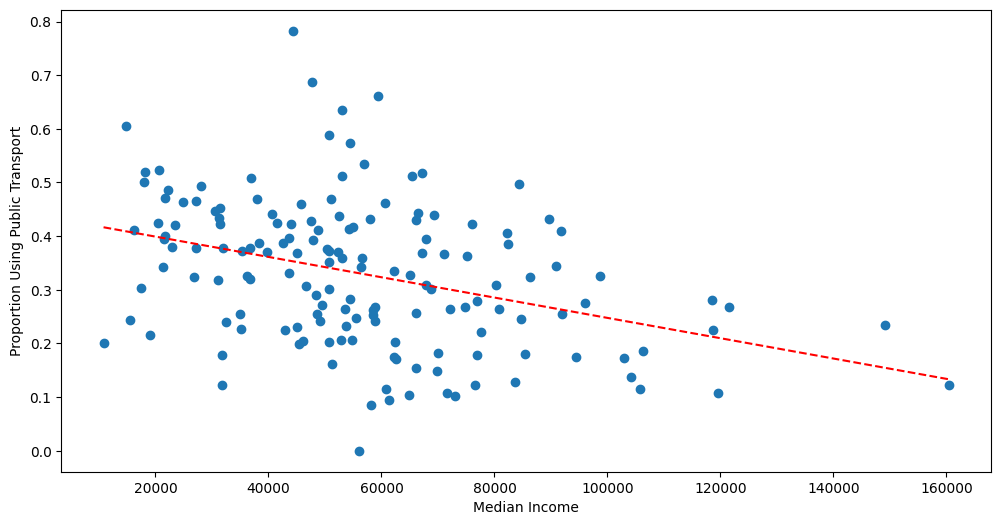

Text(0, 0.5, 'Proportion that are Carpooling')

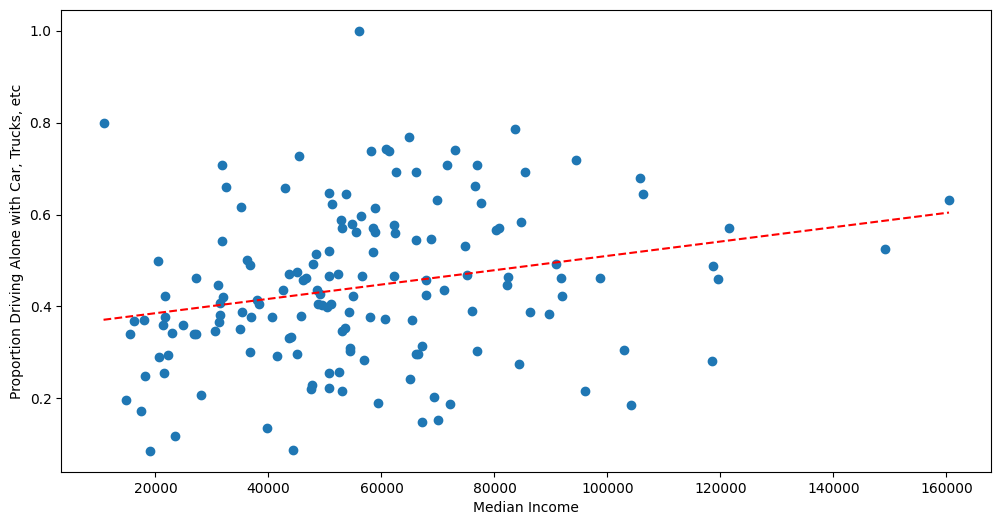

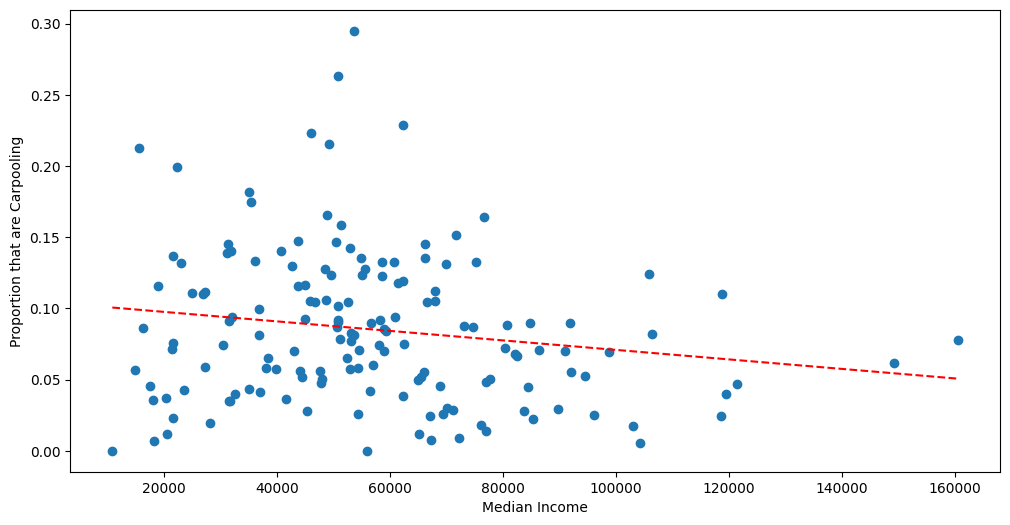

In [148]:
transportation_2013 = transportation_2013.iloc[1:]
transportation_2013 = transportation_2013.replace('(X)', pd.NA)
cols_to_convert = ['S0802_C04_001E', 'S0802_C01_001E', 'S0802_C02_001E', 'S0802_C03_001E']
for col in cols_to_convert:
    transportation_2013[col] = pd.to_numeric(transportation_2013[col], errors='coerce')
    
transportation_2013 = transportation_2013.dropna(axis=1, how='all')

transportation_2013['Public_Transport_Ratio'] = transportation_2013['S0802_C04_001E'] / transportation_2013['S0802_C01_001E']
transportation_2013['Drive_Alone_Ratio'] = transportation_2013['S0802_C02_001E'] / transportation_2013['S0802_C01_001E']
transportation_2013['Carpool_Ratio'] = transportation_2013['S0802_C03_001E'] / transportation_2013['S0802_C01_001E']

trans_inc_merged_2013 = pd.merge(transportation_2013, income_data_2013, on='GEO_ID')

trans_inc_merged_2013.rename(columns={
    'S1901_C01_012E': 'Median Household Income'
}, inplace=True)

trans_inc_merged_2013 = trans_inc_merged_2013.drop(trans_inc_merged_2013.index[0])
trans_inc_merged_2013['Median Household Income'] = trans_inc_merged_2013['Median Household Income'].replace('-', np.nan)
trans_inc_merged_2013['Median Household Income'].dropna()

correlation_matrix = trans_inc_merged_2013[['Median Household Income', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio']].corr()

# print(correlation_matrix)

trans_inc_merged_2013['Median Household Income'] = pd.to_numeric(trans_inc_merged_2013['Median Household Income'], errors='coerce')
trans_inc_merged_2013['Public_Transport_Ratio'] = pd.to_numeric(trans_inc_merged_2013['Public_Transport_Ratio'], errors='coerce')

###### Graphs #####

plt.figure(figsize=(12, 6))  # 12 inches wide by 6 inches tall
plt.scatter(trans_inc_merged_2013['Median Household Income'], trans_inc_merged_2013['Public_Transport_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion Using Public Transport')

cleaned_data = trans_inc_merged_2013.dropna(subset=['Median Household Income', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio'])

x = cleaned_data['Median Household Income']
y = cleaned_data['Public_Transport_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.show()

plt.figure(figsize=(12, 6))

x = cleaned_data['Median Household Income']
y = cleaned_data['Drive_Alone_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.scatter(trans_inc_merged_2013['Median Household Income'], trans_inc_merged_2013['Drive_Alone_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion Driving Alone with Car, Trucks, etc')

plt.figure(figsize=(12,6))

x = cleaned_data['Median Household Income']
y = cleaned_data['Carpool_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.scatter(trans_inc_merged_2013['Median Household Income'], trans_inc_merged_2013['Carpool_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion that are Carpooling')




The section above shows the median income of households per census tract put against means of transportation per census tract in 2013. Using the means of transportation data, I used a ratio of the people who chose the type of transportation, against the total number of people who answered the survey in that area. Using a ratio makes more sense as it would scale the numbers, and even out the playing field - thus census tracts with a larger sample size wouldn't have a stronger influence on the trend and data.

As observed, there is a positive correlation between income and choosing to drive alone to work, whereas carpooling and public transport has a negative correlation. This makes sense as driving alone or owning a private vehicle typically come with higher expenses that higher income households are more comfortable with expending. With that being said, the sections below will conduct the same correlation analysis for 2016, 2019, and 2022. It is expected that all years follow a similar trend. However, in showing this correlation, we can say that there is some relationship and we can delve deeper into looking at the different relationships that occur within census tracts as a way to point out potential displacement that is occuring.

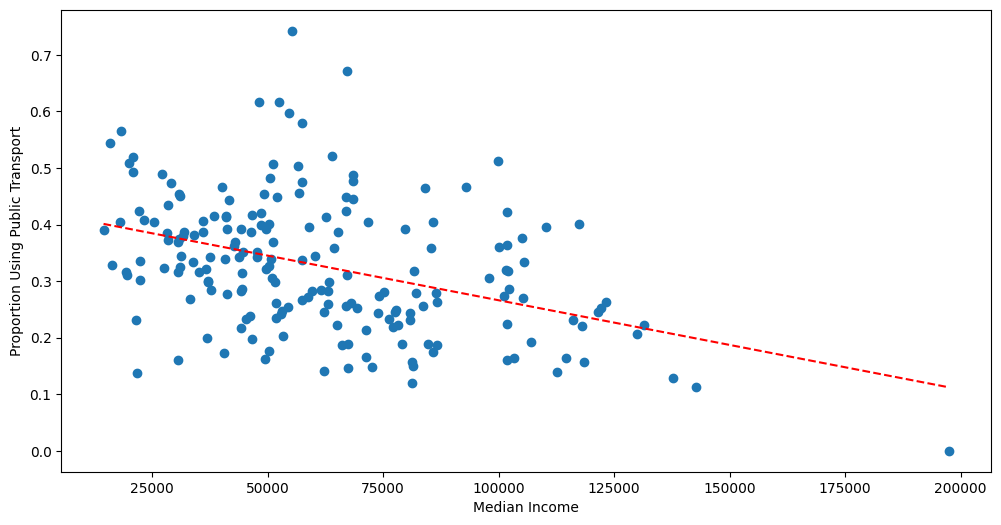

Text(0, 0.5, 'Proportion that are Carpooling')

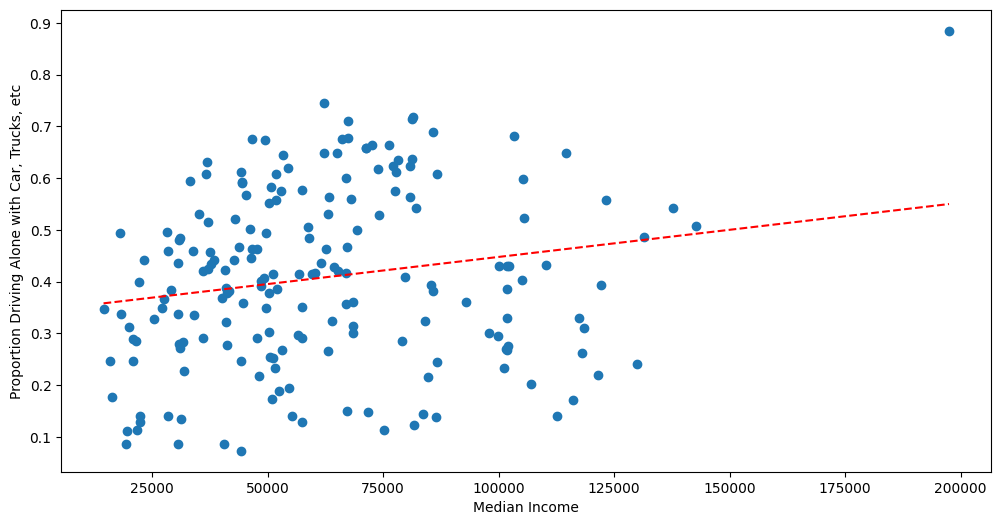

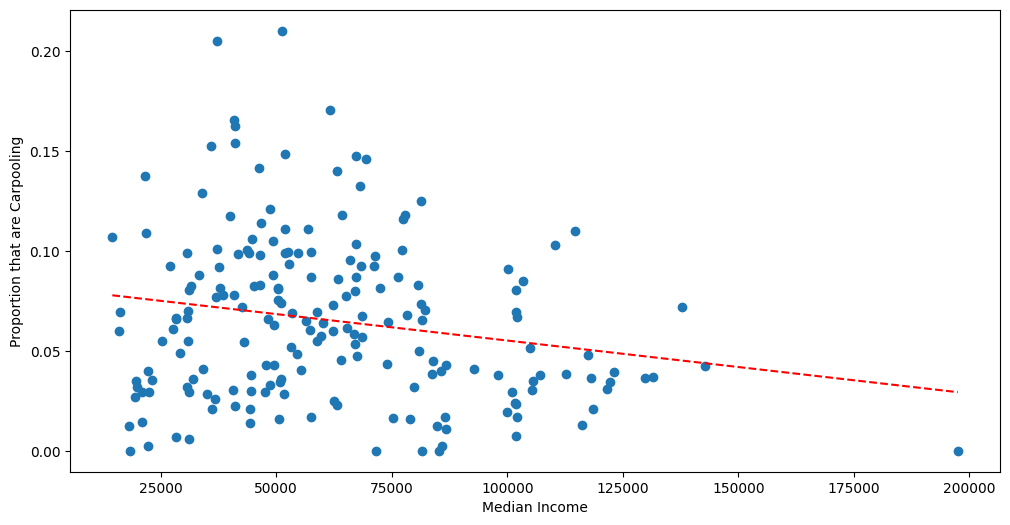

In [149]:
transportation_2016 = transportation_2016.iloc[1:]
transportation_2016 = transportation_2016.replace('(X)', pd.NA)
cols_to_convert = ['S0802_C04_001E', 'S0802_C01_001E', 'S0802_C02_001E', 'S0802_C03_001E']
for col in cols_to_convert:
    transportation_2016[col] = pd.to_numeric(transportation_2016[col], errors='coerce')
    
transportation_2016 = transportation_2016.dropna(axis=1, how='all')

transportation_2016['Public_Transport_Ratio'] = transportation_2016['S0802_C04_001E'] / transportation_2016['S0802_C01_001E']
transportation_2016['Drive_Alone_Ratio'] = transportation_2016['S0802_C02_001E'] / transportation_2016['S0802_C01_001E']
transportation_2016['Carpool_Ratio'] = transportation_2016['S0802_C03_001E'] / transportation_2016['S0802_C01_001E']

trans_inc_merged_2016 = pd.merge(transportation_2016, income_data_2016, on='GEO_ID')

trans_inc_merged_2016.rename(columns={
    'S1901_C01_012E': 'Median Household Income'
}, inplace=True)

trans_inc_merged_2016 = trans_inc_merged_2016.drop(trans_inc_merged_2016.index[0])
trans_inc_merged_2016['Median Household Income'] = trans_inc_merged_2016['Median Household Income'].replace('-', np.nan)
trans_inc_merged_2016['Median Household Income'].dropna()

correlation_matrix = trans_inc_merged_2016[['Median Household Income', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio']].corr()

# print(correlation_matrix)

trans_inc_merged_2016['Median Household Income'] = pd.to_numeric(trans_inc_merged_2016['Median Household Income'], errors='coerce')
trans_inc_merged_2016['Public_Transport_Ratio'] = pd.to_numeric(trans_inc_merged_2016['Public_Transport_Ratio'], errors='coerce')

###### Graphs #####

plt.figure(figsize=(12, 6))  # 12 inches wide by 6 inches tall
plt.scatter(trans_inc_merged_2016['Median Household Income'], trans_inc_merged_2016['Public_Transport_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion Using Public Transport')

cleaned_data_2016 = trans_inc_merged_2016.dropna(subset=['Median Household Income', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio'])

x = cleaned_data_2016['Median Household Income']
y = cleaned_data_2016['Public_Transport_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.show()

plt.figure(figsize=(12, 6))

x = cleaned_data_2016['Median Household Income']
y = cleaned_data_2016['Drive_Alone_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.scatter(trans_inc_merged_2016['Median Household Income'], trans_inc_merged_2016['Drive_Alone_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion Driving Alone with Car, Trucks, etc')

plt.figure(figsize=(12,6))

x = cleaned_data_2016['Median Household Income']
y = cleaned_data_2016['Carpool_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.scatter(trans_inc_merged_2016['Median Household Income'], trans_inc_merged_2016['Carpool_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion that are Carpooling')

The data above is for 2016. There is one clear outlier at the incredibly high median income. This likely means that not many people surveyed.

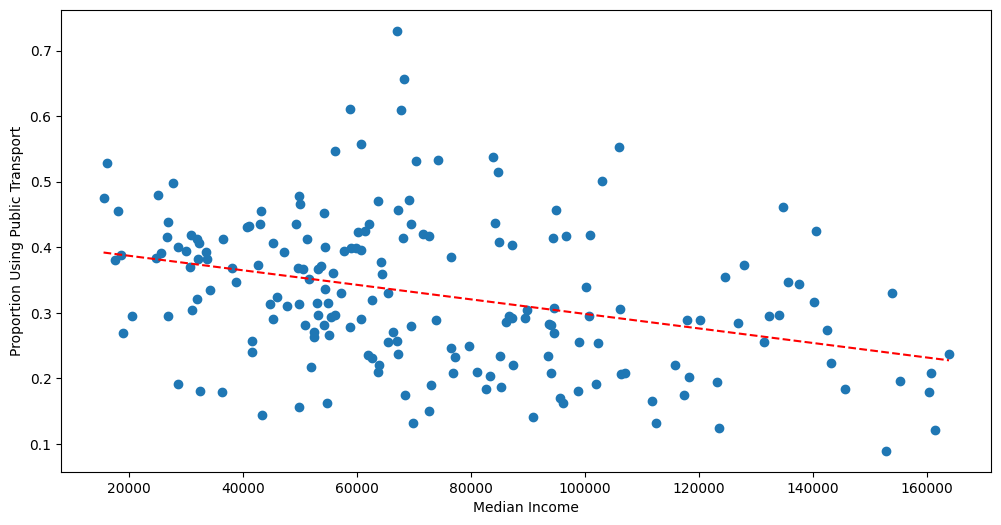

Text(0, 0.5, 'Proportion that are Carpooling')

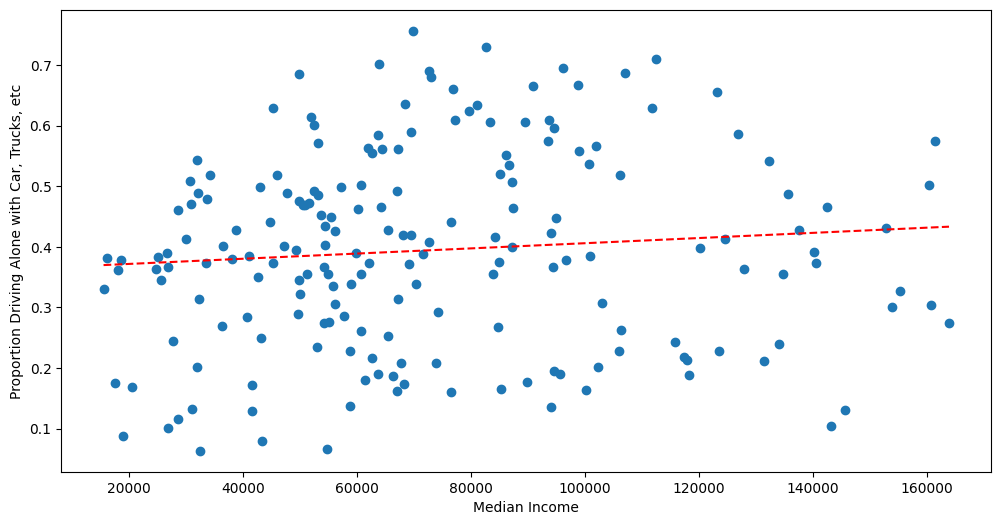

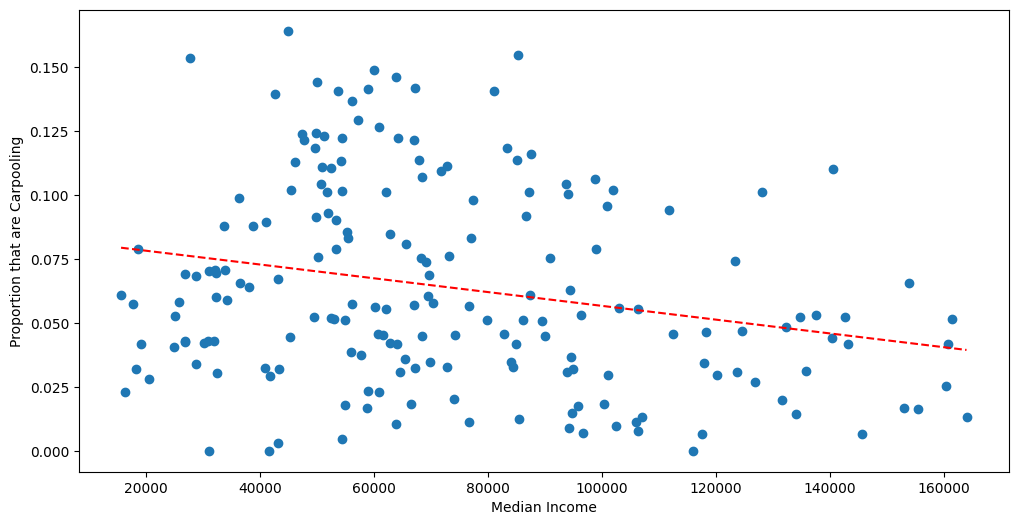

In [150]:
transportation_2019 = transportation_2019.iloc[1:]
transportation_2019 = transportation_2019.replace('(X)', pd.NA)
cols_to_convert = ['S0802_C04_001E', 'S0802_C01_001E', 'S0802_C02_001E', 'S0802_C03_001E']
for col in cols_to_convert:
    transportation_2019[col] = pd.to_numeric(transportation_2019[col], errors='coerce')
    
transportation_2019 = transportation_2019.dropna(axis=1, how='all')

transportation_2019['Public_Transport_Ratio'] = transportation_2019['S0802_C04_001E'] / transportation_2019['S0802_C01_001E']
transportation_2019['Drive_Alone_Ratio'] = transportation_2019['S0802_C02_001E'] / transportation_2019['S0802_C01_001E']
transportation_2019['Carpool_Ratio'] = transportation_2019['S0802_C03_001E'] / transportation_2019['S0802_C01_001E']

trans_inc_merged_2019 = pd.merge(transportation_2019, income_data_2019, on='GEO_ID')

trans_inc_merged_2019.rename(columns={
    'S1901_C01_012E': 'Median Household Income'
}, inplace=True)

trans_inc_merged_2019 = trans_inc_merged_2019.drop(trans_inc_merged_2019.index[0])
trans_inc_merged_2019['Median Household Income'] = trans_inc_merged_2019['Median Household Income'].replace('-', np.nan)
trans_inc_merged_2019['Median Household Income'].dropna()

correlation_matrix = trans_inc_merged_2019[['Median Household Income', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio']].corr()

# print(correlation_matrix)

trans_inc_merged_2019['Median Household Income'] = pd.to_numeric(trans_inc_merged_2019['Median Household Income'], errors='coerce')
trans_inc_merged_2019['Public_Transport_Ratio'] = pd.to_numeric(trans_inc_merged_2019['Public_Transport_Ratio'], errors='coerce')

###### Graphs #####

plt.figure(figsize=(12, 6))  # 12 inches wide by 6 inches tall
plt.scatter(trans_inc_merged_2019['Median Household Income'], trans_inc_merged_2019['Public_Transport_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion Using Public Transport')

cleaned_data_2019 = trans_inc_merged_2019.dropna(subset=['Median Household Income', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio'])

x = cleaned_data_2019['Median Household Income']
y = cleaned_data_2019['Public_Transport_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.show()

plt.figure(figsize=(12, 6))

x = cleaned_data_2019['Median Household Income']
y = cleaned_data_2019['Drive_Alone_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.scatter(trans_inc_merged_2019['Median Household Income'], trans_inc_merged_2019['Drive_Alone_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion Driving Alone with Car, Trucks, etc')

plt.figure(figsize=(12,6))

x = cleaned_data_2019['Median Household Income']
y = cleaned_data_2019['Carpool_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.scatter(trans_inc_merged_2019['Median Household Income'], trans_inc_merged_2019['Carpool_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion that are Carpooling')

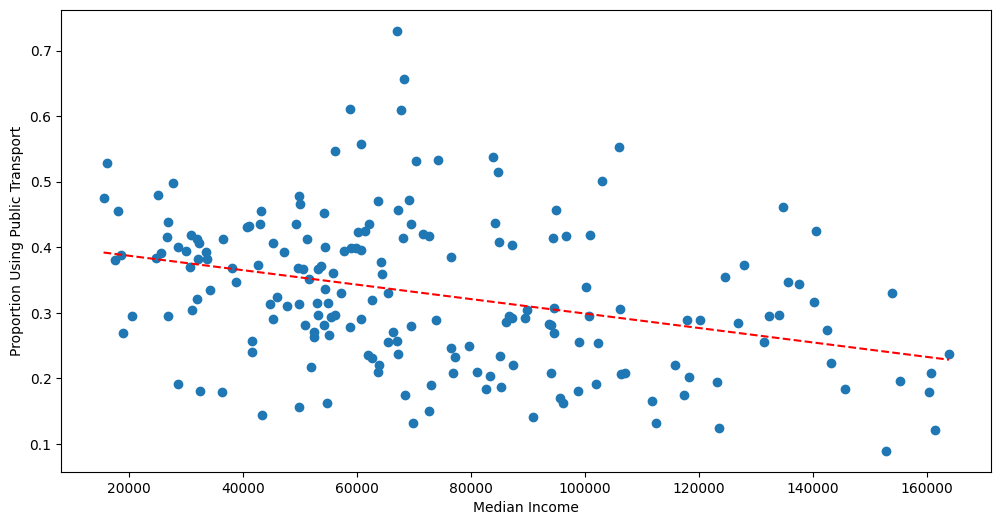

Text(0, 0.5, 'Proportion that are Carpooling')

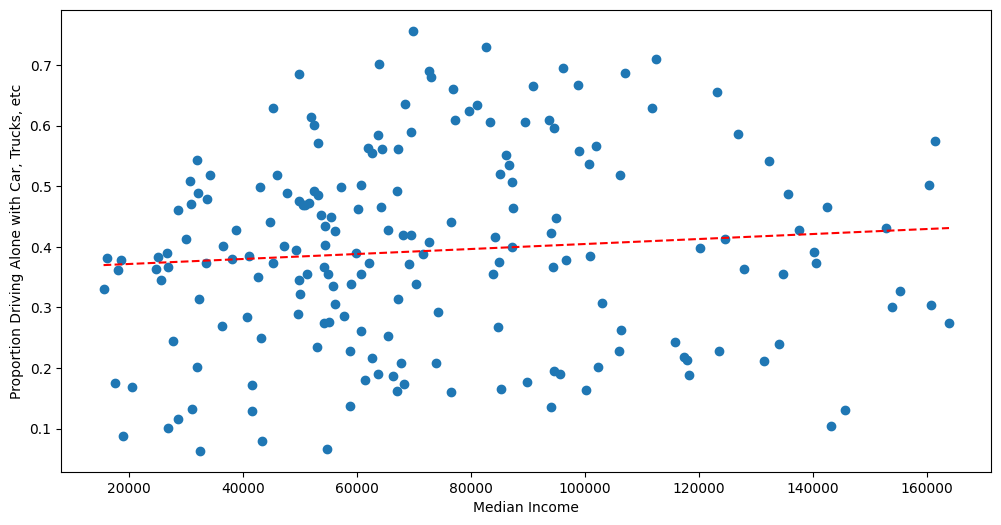

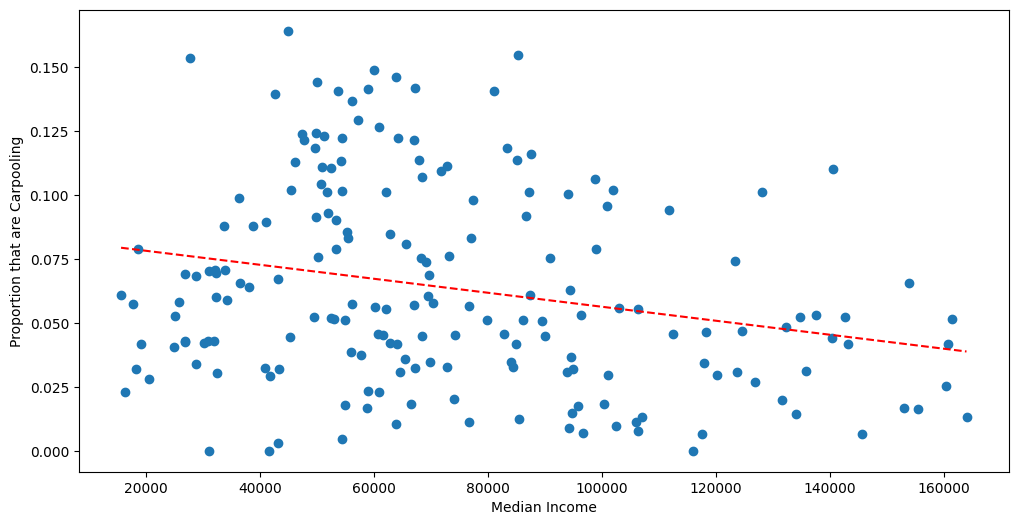

In [151]:
transportation_2019 = transportation_2019.iloc[1:]
transportation_2019 = transportation_2019.replace('(X)', pd.NA)
cols_to_convert = ['S0802_C04_001E', 'S0802_C01_001E', 'S0802_C02_001E', 'S0802_C03_001E']
for col in cols_to_convert:
    transportation_2019[col] = pd.to_numeric(transportation_2019[col], errors='coerce')
    
transportation_2019 = transportation_2019.dropna(axis=1, how='all')

transportation_2019['Public_Transport_Ratio'] = transportation_2019['S0802_C04_001E'] / transportation_2019['S0802_C01_001E']
transportation_2019['Drive_Alone_Ratio'] = transportation_2019['S0802_C02_001E'] / transportation_2019['S0802_C01_001E']
transportation_2019['Carpool_Ratio'] = transportation_2019['S0802_C03_001E'] / transportation_2019['S0802_C01_001E']

trans_inc_merged_2019 = pd.merge(transportation_2019, income_data_2019, on='GEO_ID')

trans_inc_merged_2019.rename(columns={
    'S1901_C01_012E': 'Median Household Income'
}, inplace=True)

trans_inc_merged_2019 = trans_inc_merged_2019.drop(trans_inc_merged_2019.index[0])
trans_inc_merged_2019['Median Household Income'] = trans_inc_merged_2019['Median Household Income'].replace('-', np.nan)
trans_inc_merged_2019['Median Household Income'].dropna()

correlation_matrix = trans_inc_merged_2019[['Median Household Income', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio']].corr()

# print(correlation_matrix)

trans_inc_merged_2019['Median Household Income'] = pd.to_numeric(trans_inc_merged_2019['Median Household Income'], errors='coerce')
trans_inc_merged_2019['Public_Transport_Ratio'] = pd.to_numeric(trans_inc_merged_2019['Public_Transport_Ratio'], errors='coerce')

###### Graphs #####

plt.figure(figsize=(12, 6))  # 12 inches wide by 6 inches tall
plt.scatter(trans_inc_merged_2019['Median Household Income'], trans_inc_merged_2019['Public_Transport_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion Using Public Transport')

cleaned_data_2019 = trans_inc_merged_2019.dropna(subset=['Median Household Income', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio'])

x = cleaned_data_2019['Median Household Income']
y = cleaned_data_2019['Public_Transport_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.show()

plt.figure(figsize=(12, 6))

x = cleaned_data_2019['Median Household Income']
y = cleaned_data_2019['Drive_Alone_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.scatter(trans_inc_merged_2019['Median Household Income'], trans_inc_merged_2019['Drive_Alone_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion Driving Alone with Car, Trucks, etc')

plt.figure(figsize=(12,6))

x = cleaned_data_2019['Median Household Income']
y = cleaned_data_2019['Carpool_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.scatter(trans_inc_merged_2019['Median Household Income'], trans_inc_merged_2019['Carpool_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion that are Carpooling')

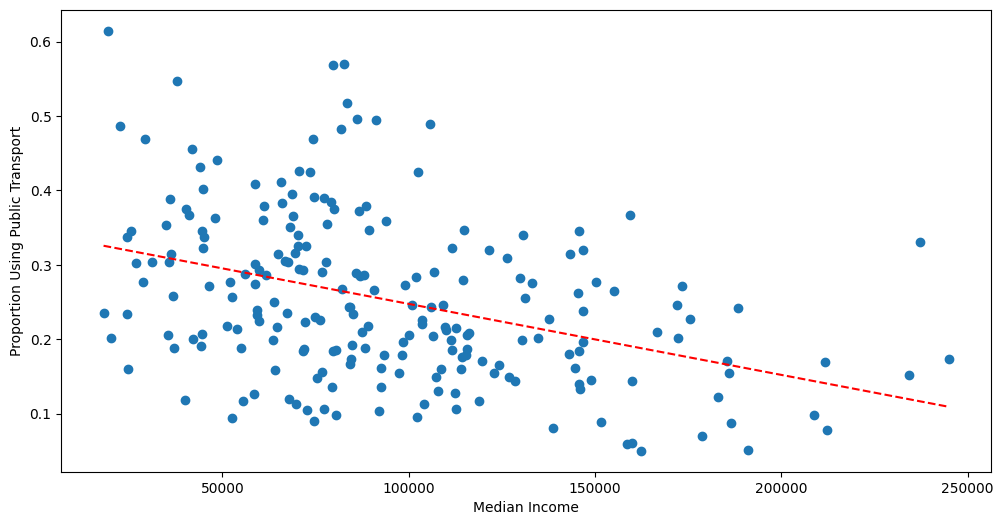

Text(0, 0.5, 'Proportion that are Carpooling')

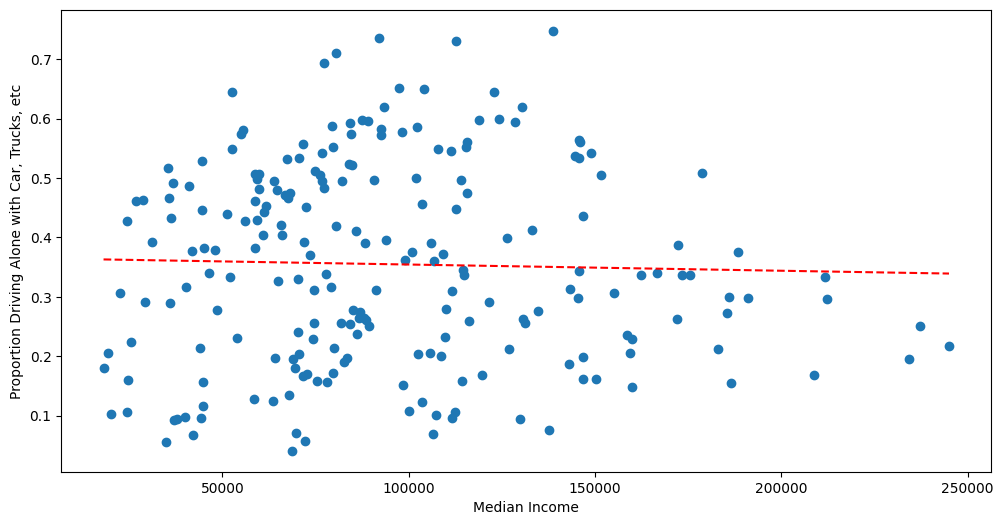

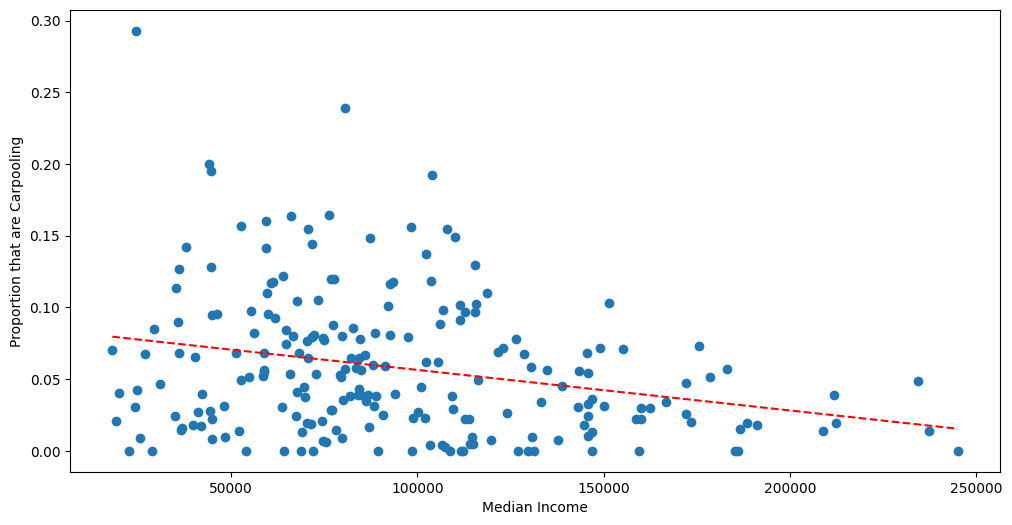

In [152]:
transportation_2022 = transportation_2022.iloc[1:]
transportation_2022 = transportation_2022.replace('(X)', pd.NA)
cols_to_convert = ['S0802_C04_001E', 'S0802_C01_001E', 'S0802_C02_001E', 'S0802_C03_001E']
for col in cols_to_convert:
    transportation_2022[col] = pd.to_numeric(transportation_2022[col], errors='coerce')
    
transportation_2022 = transportation_2022.dropna(axis=1, how='all')

transportation_2022['Public_Transport_Ratio'] = transportation_2022['S0802_C04_001E'] / transportation_2022['S0802_C01_001E']
transportation_2022['Drive_Alone_Ratio'] = transportation_2022['S0802_C02_001E'] / transportation_2022['S0802_C01_001E']
transportation_2022['Carpool_Ratio'] = transportation_2022['S0802_C03_001E'] / transportation_2022['S0802_C01_001E']

trans_inc_merged_2022 = pd.merge(transportation_2022, income_data_2022, on='GEO_ID')

trans_inc_merged_2022.rename(columns={
    'S1901_012E': 'Median Household Income'
}, inplace=True)

trans_inc_merged_2022 = trans_inc_merged_2022.drop(trans_inc_merged_2022.index[0])
trans_inc_merged_2022['Median Household Income'] = trans_inc_merged_2022['Median Household Income'].replace('-', np.nan)
trans_inc_merged_2022['Median Household Income'].dropna()

correlation_matrix = trans_inc_merged_2022[['Median Household Income', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio']].corr()

# print(correlation_matrix)

trans_inc_merged_2022['Median Household Income'] = pd.to_numeric(trans_inc_merged_2022['Median Household Income'], errors='coerce')
trans_inc_merged_2022['Public_Transport_Ratio'] = pd.to_numeric(trans_inc_merged_2022['Public_Transport_Ratio'], errors='coerce')

###### Graphs #####

plt.figure(figsize=(12, 6))  # 12 inches wide by 6 inches tall
plt.scatter(trans_inc_merged_2022['Median Household Income'], trans_inc_merged_2022['Public_Transport_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion Using Public Transport')

cleaned_data_2022 = trans_inc_merged_2022.dropna(subset=['Median Household Income', 'Public_Transport_Ratio', 'Drive_Alone_Ratio', 'Carpool_Ratio'])

x = cleaned_data_2022['Median Household Income']
y = cleaned_data_2022['Public_Transport_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.show()

plt.figure(figsize=(12, 6))

x = cleaned_data_2022['Median Household Income']
y = cleaned_data_2022['Drive_Alone_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.scatter(trans_inc_merged_2022['Median Household Income'], trans_inc_merged_2022['Drive_Alone_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion Driving Alone with Car, Trucks, etc')

plt.figure(figsize=(12,6))

x = cleaned_data_2022['Median Household Income']
y = cleaned_data_2022['Carpool_Ratio']

# Compute the polynomial coefficients (degree 1 for linear)
coefficients = np.polyfit(x, y, 1)

# Create a polynomial function using these coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline (covering the whole range of x)
x_vals = np.linspace(x.min(), x.max(), 100)

# Generate y values for the trendline
y_vals = polynomial(x_vals)

plt.plot(x_vals, y_vals, 'r--', label=f'Fit line: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

plt.scatter(trans_inc_merged_2022['Median Household Income'], trans_inc_merged_2022['Carpool_Ratio'])
plt.xlabel('Median Income')
plt.ylabel('Proportion that are Carpooling')

#### Further Analysis: Delving Deeper into Census Tracts ####

Now that I have looked into the basic correlation of the three modes of transportation to median household income, it is time to look at the nuanced changes and shifts within census tracts. On top of that, we can also look at how the means of transportation shifts over the span of 9 years (from 2013 to 2022). Depending on how it shifts, we can make hunches and assumptions on quality of public transportation, change in demographics, et cetera.

- Idea: pair this up with rent price shifts and property value shifting -- does an increase of means of public transportation of that area lead to a more drastic increase in property value
  - Perhaps gentrification of that area? More convenience means the area becomes more valuable -- thus maybe pair it up with income data and see if there is an influx of high income people coming in -- negative impacts of displacement (or perhaps, more convenient for low income individuals as it is clear that low income individuals would prefer public transit)